In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#### Dataset

In [3]:
df=pd.read_excel('E:\ML\Timeperiod estimation\TP.xlsx', sheet_name='Values of Fundamental Period')
data=np.array(df)
print(data)
val=round((data.shape[0])*0.7)
x_train=data[0:val,0:5]
y_train=data[0:val,5]

x_test=data[val:,0:5]
y_test=data[val:,5]


print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
# Number of Storeys,Number of Spans,Length of Spans (m),Opening percentage (%),Masonry wall Stiffeness Et (×10^5 kN/m),Period (Sec)

[[1.0000e+00 2.0000e+00 3.0000e+00 0.0000e+00 2.2500e+00 9.2970e-02]
 [1.0000e+00 2.0000e+00 3.0000e+00 1.0000e+02 2.2500e+00 1.5975e-01]
 [1.0000e+00 2.0000e+00 3.0000e+00 1.0000e+02 4.5000e+00 1.5975e-01]
 ...
 [2.2000e+01 6.0000e+00 7.5000e+00 1.0000e+02 1.5000e+01 3.4740e+00]
 [2.2000e+01 6.0000e+00 7.5000e+00 1.0000e+02 2.0000e+01 3.4740e+00]
 [2.2000e+01 6.0000e+00 7.5000e+00 1.0000e+02 2.5000e+01 3.4740e+00]]
(2818, 5) (2818,) (1208, 5) (1208,)


## Normalization of only input

In [4]:
norm_1= tf.keras.layers.Normalization(axis=-1)
# this is will create a layer to normalize along 
#the axis=-1 of the input data
norm_1.adapt(x_train)
# the adapt function calculates the mean
#and variance  of the data given to the adapt
Xn=norm_1(x_train)
Xn_test=norm_1(x_test)

print(Xn)

print(f"Number of storeys Max, Min pre normalization: {np.max(x_train[:,0]):0.2f}, {np.min(x_train[:,0]):0.2f}")
print(f"Number of spans    Max, Min pre normalization: {np.max(x_train[:,1]):0.2f}, {np.min(x_train[:,1]):0.2f}")
print(f"span length    Max, Min pre normalization: {np.max(x_train[:,2]):0.2f}, {np.min(x_train[:,2]):0.2f}")
print(f"Opening percentage Max, Min pre normalization: {np.max(x_train[:,3]):0.2f}, {np.min(x_train[:,3]):0.2f}")
print(f"Masontry wall stiffness    Max, Min pre normalization: {np.max(x_train[:,4]):0.2f}, {np.min(x_train[:,4]):0.2f}")


print(f"Number of storeys Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Number of spans    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")
print(f"span length    Max, Min post normalization: {np.max(Xn[:,2]):0.2f}, {np.min(Xn[:,2]):0.2f}")
print(f"Opening percentage Max, Min post normalization: {np.max(Xn[:,3]):0.2f}, {np.min(Xn[:,3]):0.2f}")
print(f"Masontry wall stiffness    Max, Min post normalization: {np.max(Xn[:,4]):0.2f}, {np.min(Xn[:,4]):0.2f}")

tf.Tensor(
[[-1.619785   -1.8607953  -1.2590955  -1.5770253  -1.2174183 ]
 [-1.619785   -1.8607953  -1.2590955   0.90881246 -1.2174183 ]
 [-1.619785   -1.8607953  -1.2590955   0.90881246 -0.92851055]
 ...
 [ 1.7513784   0.69711894 -1.2590955  -1.5770253   1.7037605 ]
 [ 1.7513784   0.69711894 -1.2590955  -0.95556587 -1.2174183 ]
 [ 1.7513784   0.69711894 -1.2590955  -0.95556587 -0.92851055]], shape=(2818, 5), dtype=float32)
Number of storeys Max, Min pre normalization: 16.00, 1.00
Number of spans    Max, Min pre normalization: 6.00, 2.00
span length    Max, Min pre normalization: 7.50, 3.00
Opening percentage Max, Min pre normalization: 100.00, 0.00
Masontry wall stiffness    Max, Min pre normalization: 25.00, 2.25
Number of storeys Max, Min post normalization: 1.75, -1.62
Number of spans    Max, Min post normalization: 0.70, -1.86
span length    Max, Min post normalization: 1.59, -1.26
Opening percentage Max, Min post normalization: 0.91, -1.58
Masontry wall stiffness    Max, Min post

# Development of ANN model

### 1. Creating the layers and neurons,activation functions

In [5]:
tf.random.set_seed(1234)
model= tf.keras.Sequential(
     [
    tf.keras.Input(shape=(5,)),
    tf.keras.layers.Dense(3, activation='ReLU', name='L_1'),
    tf.keras.layers.Dense(3, activation='ReLU', name='L_2'),
    tf.keras.layers.Dense(1, activation='ReLU', name='L_3'),     
     ]
    )

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L_1 (Dense)                 (None, 3)                 18        
                                                                 
 L_2 (Dense)                 (None, 3)                 12        
                                                                 
 L_3 (Dense)                 (None, 1)                 4         
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


### 2. Doing the compile and fit commands

In [7]:
model.compile(
loss=tf.keras.losses.MeanSquaredError(),
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
metrics=['accuracy']
)

model.fit(Xn,y_train,epochs=10)

Epoch 1/10
89/89 [==============================] - 2s 3ms/step - loss: 0.1330 - accuracy: 3.5486e-04
Epoch 2/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 3.5486e-04
Epoch 3/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 3.5486e-04
Epoch 4/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 3.5486e-04
Epoch 5/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 3.5486e-04
Epoch 6/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 3.5486e-04
Epoch 7/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 3.5486e-04
Epoch 8/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 3.5486e-04
Epoch 9/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 3.5486e-04
Epoch 10/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0096 - 

In [8]:
y_pred_train=model.predict(Xn)

print(y_pred_train)


89/89 [==============================] - 1s 2ms/step
[[0.18799861]
 [0.18799861]
 [0.18799861]
 ...
 [0.3679043 ]
 [1.1686105 ]
 [1.1237886 ]]


In [9]:
y_pred_test=model.predict(Xn_test)
print(y_pred_test)

38/38 [==============================] - 0s 2ms/step
[[1.0640261 ]
 [0.98932296]
 [0.91461986]
 ...
 [2.7562165 ]
 [2.6566124 ]
 [2.557008  ]]


In [10]:
loss_train=model.evaluate(Xn,y_train)
loss_test,accuracy=model.evaluate(Xn_test,y_test)
    
    

38/38 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 8.2781e-04


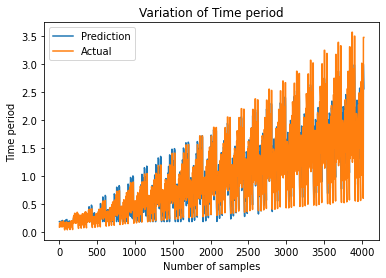

In [11]:
X_plot=np.array(range(data.shape[0]))
Y_prediction=np.concatenate((y_pred_train,y_pred_test))



# Add labels and title
# plot the first line
plt.plot(X_plot, Y_prediction, label='Prediction')

# plot the second line
plt.plot(X_plot, data[:,5], label='Actual')

# set the x-label
plt.xlabel('Number of samples')

# set the y-label for the first plot
plt.ylabel('Time period')

plt.legend()
plt.title('Variation of Time period')

plt.show()
